In [1]:
from sklearn import svm, datasets
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
iris = datasets.load_iris()
X = iris.data[ :, 0:2]
Y = iris.target

In [3]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y)

In [4]:
clf = svm.SVC()
# can also use     clf = svm.SVC(kernel = 'linear')
# then the decision boundary would consists of straight line rather than curves
clf.fit(X_train, Y_train)

C:\Users\tanej\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

###### class_weight = none means equal weight to all the classes. if you want to give a biased weight to
###### a particular class then we can do that by giving the class_weight a value

###### coef0 is not used in Gaussian or Linear. it is used in polynomial where a is coef0
###### gamma is 1/(2*(sigma**2))
###### (sigma**2) very high means underfitting as every point will have far reaching impact
###### (sigma**2) too low means overfitting as every point will influence the points in its vicinity and not the points which are at a
###### considerable distance from that

###### exactly opposite the case will be with gamma as gamma is 1/(2*(sigma**2))
###### too low gamma will lead to underfitting and very high gamma will lead to overfitting

###### default kernel is rbf i.e. the Gaussian Kernel

###### SVC implements one vs one scheme and does not gives us an option to use one vs rest
###### i.e. in sklearn.svm.SVC the multiclass support is handled according to a one-vs-one scheme 

In [5]:
clf.score(X_test, Y_test)

0.7631578947368421

In [6]:
def makegrid(x1, x2, h = 0.02):
    x1_min, x1_max = x1.min() - 1, x1.max() + 1   # did -1 and +1 to take into consideration a little previous points a little further points too
    x2_min, x2_max = x2.min() - 1, x2.max() + 1   # did -1 and +1 to take into consideration a little previous points a little further points too
    a = np.arange(x1_min, x1_max, h)     # range from 0,0.2,0.4_ _ _ _ 2.8  where h is the step up
    b = np.arange(x2_min, x2_max, h)
    xx, yy = np.meshgrid(a, b)    # this function is going to replicate array a and b multiple times
    
#     if i had array 1,2,3 and 2,3,4 meshgrid will give me points like these
#     (1,2), (1,3), (1,4), (2,2), (2,3), (2,4), (3,2), (3,3), (3,4) so with ising arange ans step up value 0.02 we have actually
#     created a mesh like structure where each horizontal point is at a distance of 0.02 from the next nearest point
#     about how the grid will look like and about it is written in the notes
#     The np.meshgrid function is used to create a rectangular grid out of two given one-dimensional arrays representing the Cartesian indexing or Matrix indexing.
    
    return xx, yy

###### we can change C and gamma. if we increase C a lot we will start seeing a lot more complex decision boundary as more C will try to minimize the errors and if we increase gamma a lot then even a small change will lead to huge difference in the function that means overfitting

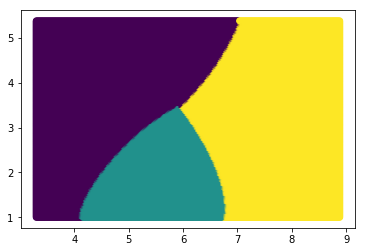

In [7]:
xx, yy = makegrid(X[:, 0], X[:, 1])   # used feature at 0th index of the IRIS dataset and feature at 1st inde of the IRIS dataset
# print(xx)
# print()
# print()
# print(yy)
predictions = clf.predict(np.c_[xx.ravel(), yy.ravel()])    
plt.scatter(xx.ravel(),yy.ravel(),c = predictions)

plt.show()

###### ravel is basically going to convert the whole array i.e. the whole mutidimensional array into a one dimensional array, a really huge array



###### np.c_ is used to combine the two arrays to make pairs. so basically if the two arrays be [1,2,3] and [4,5,6] then
###### np.c_ will make them ([1,4],[2,5],[3,6])
###### because we need these pairs to predict because for every point if we want to make a prediction we want (x1,x2)

###### for plotting we need ravel() ravel basically means again one dimensional array as the points are plotted as (x1,x2)
###### x1 will be generated by xx.ravel() and x2 will be generated by yy.ravel() as
###### plt.scatter([1,2],[4,5]) it will plot the points (1,4) and (2,5)

###### if linear kernel is used then the decision boundary would be linear but it won't be a perfect line as the predict function is called on every single point in the grid so evey point will tried to be joined keeping the decision boundary as linear as possible and thus that corresponding graph will be generated

In [8]:
x1 = np.array([1,3])
x2 = np.array([5,6])
makegrid(x1,x2)

(array([[0.  , 0.02, 0.04, ..., 3.94, 3.96, 3.98],
        [0.  , 0.02, 0.04, ..., 3.94, 3.96, 3.98],
        [0.  , 0.02, 0.04, ..., 3.94, 3.96, 3.98],
        ...,
        [0.  , 0.02, 0.04, ..., 3.94, 3.96, 3.98],
        [0.  , 0.02, 0.04, ..., 3.94, 3.96, 3.98],
        [0.  , 0.02, 0.04, ..., 3.94, 3.96, 3.98]]),
 array([[4.  , 4.  , 4.  , ..., 4.  , 4.  , 4.  ],
        [4.02, 4.02, 4.02, ..., 4.02, 4.02, 4.02],
        [4.04, 4.04, 4.04, ..., 4.04, 4.04, 4.04],
        ...,
        [6.94, 6.94, 6.94, ..., 6.94, 6.94, 6.94],
        [6.96, 6.96, 6.96, ..., 6.96, 6.96, 6.96],
        [6.98, 6.98, 6.98, ..., 6.98, 6.98, 6.98]]))

In [9]:
a = np.array([1,2,3])
b = np.array([2,3,4])

In [10]:
aa,bb = np.meshgrid(a,b)
print(aa)
print()
print(bb)

[[1 2 3]
 [1 2 3]
 [1 2 3]]

[[2 2 2]
 [3 3 3]
 [4 4 4]]


In [11]:
aa.shape

(3, 3)

In [12]:
bb.shape

(3, 3)

In [13]:
# aa is repeated horizontally and bb is repeated vertically to make a mesh like structure if all the points are plotted

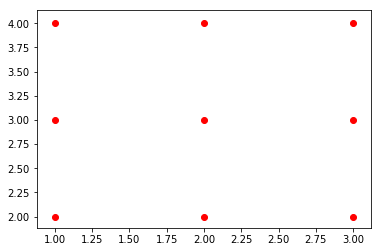

In [14]:
for i in range(3):
    for j in range(3):
        x = aa[i,j]
        y = bb[i,j]
        h = plt.scatter(x,y,color="red")
plt.show()

In [15]:
X[:,0].min()

4.3

In [16]:
X[:,1].min()

2.0

In [17]:
a = np.c_[np.array([1,2,3]), np.array([4,5,6])]
print(a)
print(a.shape)

[[1 4]
 [2 5]
 [3 6]]
(3, 2)


In [18]:
b = np.c_[np.array([[1,2,3]]), np.array([[4,5,6]])]
print(b)
print(b.shape)

[[1 2 3 4 5 6]]
(1, 6)


In [19]:
a = np.array([1,2,3])
b = np.array([4,5,6])
a = a.ravel(), b.ravel()

In [20]:
print(a)

(array([1, 2, 3]), array([4, 5, 6]))


In [21]:
a = np.c_[a]     # what np.c_ does is it combines the two array i.e. array([1,2,3]) and array([4,5,6])

In [22]:
print(a)

[[1 4]
 [2 5]
 [3 6]]


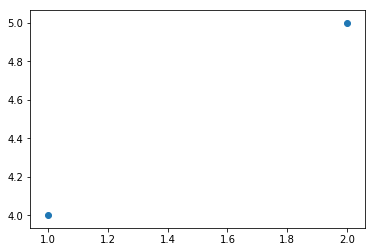

In [23]:
plt.scatter([1,2],[4,5])

In [24]:
a = np.array([[1,2],[7,4],[5,9],[14,11]])
print(a.shape)

(4, 2)


In [25]:
a = a.ravel()

In [26]:
print(a)
print(a.shape)

[ 1  2  7  4  5  9 14 11]
(8,)


###### what ravel did is basically made the 4 row and 2 column array into 1 row and 8 column array i.e. a one-dimensional array. so the function of ravel is to convert a multidimensional array into a one-dimensional array

In [39]:
a = np.array([1,2,7,8])
b = np.array([4,5,6,3])
print((a*b*b).shape[0])
print(a*b*b)

4
[ 16  50 252  72]
